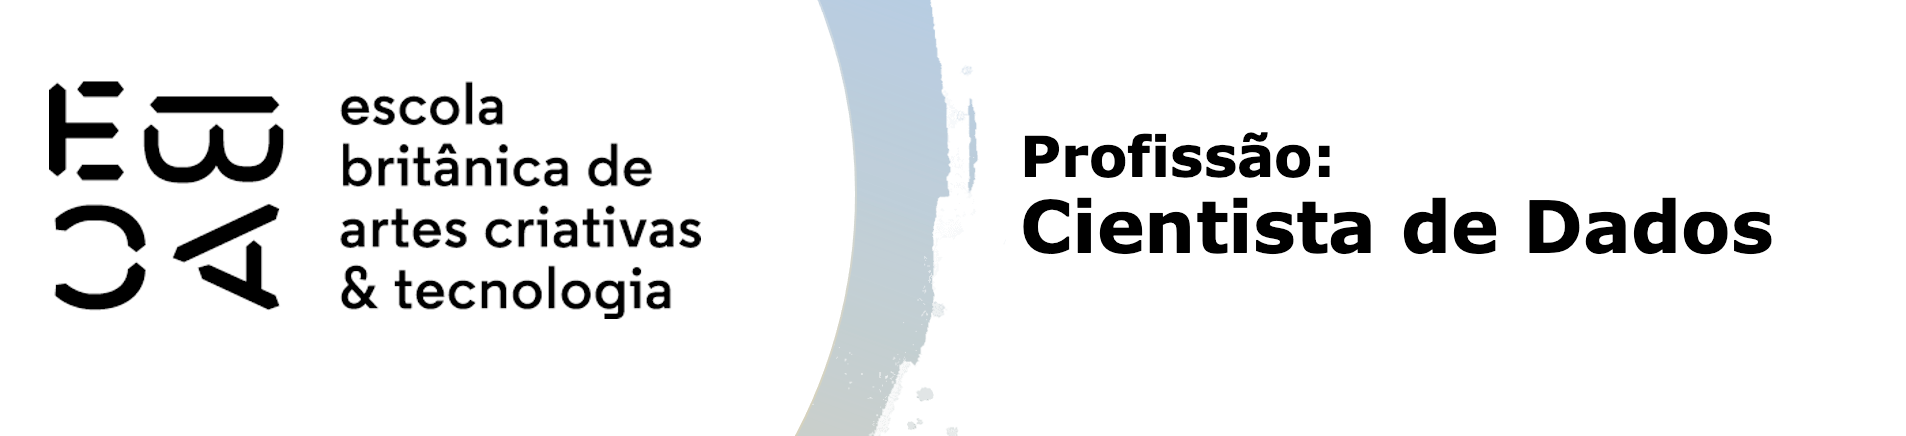

# Tarefa II

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import metrics
from scipy.stats import ks_2samp
from scipy.stats import t
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [2]:
dados = pd.read_feather('./Dados/credit_scoring.ftr')
display(dados.data_ref.value_counts().sort_values())
display(dados.head())

2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: data_ref, dtype: int64

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [3]:
df=dados[(dados['data_ref']>='2016-01-01')].copy()
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
600000,2016-01-01,8906,F,S,S,2,Assalariado,Superior completo,Casado,Casa,38,7.383562,4.0,2969.49,True
600001,2016-01-01,5063,F,N,S,0,Assalariado,Médio,Casado,Casa,55,8.471233,2.0,6278.37,False
600002,2016-01-01,16401,M,S,S,1,Assalariado,Médio,União,Casa,39,8.884932,3.0,14010.18,False
600003,2016-01-01,6786,F,N,S,1,Assalariado,Médio,União,Com os pais,31,1.794521,3.0,2875.81,False
600004,2016-01-01,13466,M,S,N,0,Assalariado,Médio,Casado,Casa,27,7.019178,2.0,2737.19,False


## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [ ]:
# Contagem das linhas por mês
print("Número de linhas por mês")
print("========================")
display(df['data_ref'].dt.to_period('M').value_counts())

# Descrição básica das variáveis qualitativas
var_ql = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'mau']
data_ql = df[var_ql]

for var in var_ql:
    print(f"*** {var} ***")
    print("===="+"="*len(var)+"====")
    display(data_ql[var].value_counts())
    
    print()

# Descrição básica das variáveis quantitativas
var_qt = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
data_qt = df[var_qt]

for var in var_qt:
    print(f"--- {var} ---")
    print("===="+"="*len(var)+"====")
    display(data_qt[var].describe())
    print()

In [ ]:
# Configurações dos gráficos
sns.set(style="dark")

# Gráficos para as variáveis qualitativas
var_ql = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'mau']
num_var_ql = len(var_ql)

plt.figure(figsize=(12, 8))
print('V A R I Á V E I S   Q U A L I T A T I V A S'.center(100))
for i, var in enumerate(var_ql):
    plt.subplot(2, (num_var_ql+1)//2, i+1)
    sns.countplot(data=df, x=var)
    # Orientação do label do eixo x
    if var in ['sexo', 'mau','posse_de_veiculo','posse_de_imovel']:
        plt.xticks(rotation=0)
    else:
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Gráficos para as variáveis quantitativas
var_qt = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
num_var_qt = len(var_qt)

plt.figure(figsize=(12, 8))
print('V A R I Á V E I S   Q U A N T I T A T I V A S'.center(100))

for i, var in enumerate(var_qt):
    plt.subplot(2, (num_var_qt+1)//2, i+1)
    sns.histplot(data=df, x=var, kde=True)
#     plt.title(var)
    if var in ['qtd_filhos', 'qt_pessoas_residencia']:
        max_value = df[var].max()
        plt.ylim(0, max_value + 5)  # Definir limite superior do eixo y
    else:
        plt.ylim(0)  # Definir limite inferior do eixo y como 0
#     plt.xticks([])  # Ocultar os valores do eixo x
sns.set(style="whitegrid")
plt.tight_layout()
plt.show()


## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

In [ ]:
print('ANÁLISE DESCRITIVA BIVARIADA DAS VARIÁVEIS QUALITATIVAS'.center(100))
# Configura o tamanho da figura e o número de linhas e colunas dos subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))

# Loop para plotar os gráficos de contagem para as variáveis qualitativas
for i, var in enumerate(var_ql[:-1]):
    plt.subplot(4, 2, i + 1)
    sns.countplot(data=df, x=var, hue='mau')
    plt.title(f'Distribuição de mau pagador por {var}')
    plt.xlabel(var)
    # Orientação do label do eixo x
    if var in ['sexo', 'posse_de_veiculo', 'posse_de_imovel']:
        plt.xticks(rotation=0)
    else:
        plt.xticks(rotation=90)

# Ajusta o espaçamento entre os subplots
plt.tight_layout()

# Exibe os gráficos
plt.show()


In [ ]:
print('ANÁLISE DESCRITIVA BIVARIADA DAS VARIÁVEIS QUANTITATIVAS'.center(100))
# Criar um DataFrame apenas com as variáveis contínuas e a variável 'mau'
df_cont = pd.DataFrame({
    'idade': df['idade'],
    'tempo_emprego': df['tempo_emprego'],
    'qt_pessoas_residencia': df['qt_pessoas_residencia'],
    'renda': df['renda'],
    'mau': df['mau']
})

# Plotar o pairplot
sns.pairplot(data=df_cont, hue='mau')

# Exibir o gráfico
plt.show()

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [ ]:
#Criando metadados
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['nmissing'] = df.isna().sum()
metadados['valores_unicos'] = df.nunique()
metadados

#### Tratamento dos valores missing na coluna 'tempo_emprego'

In [ ]:
from sklearn.linear_model import LinearRegression

# Criar um DataFrame com as variáveis relevantes para a imputação
df_nan = df[['sexo','idade','estado_civil', 'tipo_residencia', 'educacao', 'tipo_renda', 'tempo_emprego']]
df_nan = pd.get_dummies(df_nan, columns=['sexo','estado_civil','tipo_residencia','educacao', 'tipo_renda'])
display(df_nan.shape)

# Separar os dados conhecidos e os dados a serem imputados
df_known = df_nan[df_nan['tempo_emprego'].notnull()]
df_unknown = df_nan[df_nan['tempo_emprego'].isnull()]

# Separar as variáveis independentes (X) e a variável dependente (y) para o modelo de regressão
X_known = df_known.drop('tempo_emprego', axis=1)
y_known = df_known['tempo_emprego']
X_unknown = df_unknown.drop('tempo_emprego', axis=1)

# Criar e treinar o modelo de regressão
regression_model = LinearRegression()
regression_model.fit(X_known, y_known)

# Realizar a imputação dos valores ausentes
imputed_values = regression_model.predict(X_unknown)

# Preencher os valores ausentes com os valores imputados
df_nan.loc[df_nan['tempo_emprego'].isnull(), 'tempo_emprego'] = imputed_values
df.loc[df['tempo_emprego'].isnull(), 'tempo_emprego'] = imputed_values

if df['tempo_emprego'].equals(df_nan['tempo_emprego']):
    display(df.isna().sum())
    print("Valores NAN preenchidos com sucesso!")
    
else:
    print("ERRO: Colunas não correspondem")

In [ ]:
# Transformar a variável resposta em inteiro
df['mau'] = df.mau.astype('int64')
df.mau.value_counts()

In [ ]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['ep'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [ ]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype']).iloc[2:,:]
metadados['nmissing'] = df.isna().sum()
metadados['valores_unicos'] = df.nunique()
metadados['papel'] = 'covariavel'
metadados.loc['mau','papel'] = 'resposta'
metadados.loc['bom','papel'] = 'resposta'
metadados

In [ ]:
for var in metadados[metadados.papel=='covariavel'].index:
    if  (metadados.loc[var, 'valores_unicos']>6):
        metadados.loc[var, 'IV'] = IV(pd.qcut(df[var],5,duplicates='drop'), df.mau)
    else: 
        metadados.loc[var, 'IV'] = IV(df[var], df.mau)

    
metadados

### Tratamento das variáveis discretas

In [ ]:
def biv_discreta(var, df):
    df['bom'] = 1-df.mau
    g = df.groupby(var)

    biv = pd.DataFrame({'qt_bom': g['bom'].sum(),
                        'qt_mau': g['mau'].sum(),
                        'mau':g['mau'].mean(), 
                        var: g['mau'].mean().index, 
                        'cont':g[var].count()})
    
    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep
    
    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_inf/(1-biv.mau_inf))

    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))

    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral

    fig, ax = plt.subplots(2,1, figsize=(10,6))
    ax[0].plot(biv[var], biv.woe, ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite inferior')
    
    num_cat = biv.shape[0]
    ax[0].set_xlim([-.3, num_cat-.7])

    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)
    
    ax[0].set_xticks(list(range(num_cat)))
    ax[0].set_xticklabels(biv[var], rotation=0)
    
    ax[1] = biv.cont.plot.bar()
    return biv

for i, var in enumerate(var_ql[:-1]):    
    biv_discreta(var, df)

In [ ]:
df2 = df.copy()
df2.tipo_renda.replace({'Bolsista': 'Bolsista/Pensionista', 'Pensionista': 'Bolsista/Pensionista'}, inplace=True)
biv_discreta('tipo_renda', df2)

In [ ]:
df2.educacao.replace({'Pós graduação': 'Sup.Compl+Pós', 'Superior completo': 'Sup.Compl+Pós'}, inplace=True)
biv_discreta('educacao', df2)

In [ ]:
df2.tipo_residencia.replace({'Comunitário': 'Estúdio/Comun.', 'Estúdio': 'Estúdio/Comun.'}, inplace=True)
biv_discreta('tipo_residencia', df2)

### Tratamento das variáveis contínuas

In [ ]:
# Identificando as variáveis contínuas
variaveis_continuas=df2.select_dtypes(exclude='object').columns.values[2:7].tolist()
print(f'Variáveis contínuas: {variaveis_continuas}')


In [ ]:
def biv_continua(var, ncat, df):
    df['bom'] = 1-df.mau
    cat_srs, bins = pd.qcut(df[var], ncat, retbins=True, precision=0, duplicates='drop')
    g = df.groupby(cat_srs)

    biv = pd.DataFrame({'qt_bom': g['bom'].sum(),
                        'qt_mau': g['mau'].sum(),
                        'mau':g['mau'].mean(), 
                        var: g[var].mean(), 
                        'cont':g[var].count()})
    
    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep
    
    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_inf/(1-biv.mau_inf))

    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))

    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral

    fig, ax = plt.subplots(2,1, figsize=(8,6))
    ax[0].plot(biv[var], biv.woe, ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite inferior')
    
    num_cat = biv.shape[0]

    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)
    
    ax[1] = biv.cont.plot.bar()
    return None

In [ ]:
for i, var in enumerate(variaveis_continuas):
    biv_continua(var, 5,df2)

### Scorecard inicial

In [ ]:
# formatando a fórmula para definir a equação da regressão
variaveis=' + '.join(list(df2.columns[2:-2]))
target='mau'
formula = '''
{} ~ {}
'''.format(target, variaveis)
formula

In [ ]:
rl = smf.glm(formula, data=df2, family=sm.families.Binomial()).fit()

rl.summary()

In [ ]:
metadados.sort_values(by='IV', ascending=False)

In [ ]:
IV = metadados['IV']
indices = []

for variavel, valor_IV in IV.items():
    if valor_IV > 0.01:
        indices.append(variavel)

display(' + '.join(indices))

# formatando a fórmula para definir a equação da regressão
variaveis=' + '.join(indices)
target='mau'
formula = '''
{} ~ {}
'''.format(target, variaveis)


In [ ]:
rl = smf.glm(formula, data=df2, family=sm.families.Binomial()).fit()

rl.summary()

## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [ ]:
df2['score'] = rl.predict(df2)

# Acurácia
acc = metrics.accuracy_score(df2.mau, df2.score>.068)
#AUC
fpr, tpr, thresholds = metrics.roc_curve(df2.mau, df2.score)
auc = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc -1
ks = ks_2samp(df2.loc[df2.mau == 1, 'score'], df2.loc[df2.mau != 1, 'score']).statistic

print('Acurácia: {0:.1%} \nAUC: {1:.1%} \nGINI: {2:.1%}\nKS: {3:.1%}'
      .format(acc, auc, gini, ks))

### Características do modelo

In [ ]:
def perfil_var(df, var, ev='mau', score='score', ncat=None):
    
    _df = df.copy()
    _df['ev'] = _df[ev]
    _df['nev'] = 1 - _df[ev]
    
    if ncat == None:
        g = _df.groupby(var)
    else:
        g = _df.groupby(pd.qcut(_df[var], ncat, duplicates='drop'))

    tg = g.agg({score:'mean', 'ev':'sum', 'nev':'sum'})
    tg['total'] = tg.ev + tg.nev
    tg['distribuição'] = tg.total/tg.total.sum()

    tg['total_acum'] = tg['total'].cumsum()
    tg['ev_acum']    = tg.ev.cumsum()
    tg['nev_acum']   = tg.nev.cumsum()

    tg['tx_ev']     = tg.ev/tg.total
    tg['ep']        = (tg.tx_ev*(1-tg.tx_ev)/tg.total)**.5
    tg['tx_ev_sup'] = tg.score+t.ppf([0.025], tg.total-1)*tg.ep
    tg['tx_ev_inf'] = tg.score+t.ppf([0.975], tg.total-1)*tg.ep

    fig, ax = plt.subplots()
    
    if ncat == None:
        ax.plot(tg.reset_index()[var], tg.reset_index(drop=True).score    , 'b-' , label='esperado')
        ax.plot(tg.reset_index()[var], tg.reset_index(drop=True).tx_ev    , 'r--', label='observado')
        ax.plot(tg.reset_index()[var], tg.reset_index(drop=True).tx_ev_sup, 'r:',  label='obs-ls')
        ax.plot(tg.reset_index()[var], tg.reset_index(drop=True).tx_ev_inf, 'r:',  label='obs-li')
    else:
        tg[var+'_med'] = g[var].mean()
        ax.plot(tg[var+'_med'], tg.reset_index(drop=True).score    , 'b-' , label='esperado')
        ax.plot(tg[var+'_med'], tg.reset_index(drop=True).tx_ev    , 'r--', label='observado')
        ax.plot(tg[var+'_med'], tg.reset_index(drop=True).tx_ev_sup, 'r:',  label='obs-ls')
        ax.plot(tg[var+'_med'], tg.reset_index(drop=True).tx_ev_inf, 'r:',  label='obs-li')
    return tg[['distribuição', score, 'tx_ev']]
indices

In [ ]:
tg = perfil_var(df2, 'idade', ncat=10)
tg.reset_index().style.format({'score':'{:.1%}', 'tx_ev':'{:.1%}', 'distribuição':'{:.1%}'})

In [ ]:
tg = perfil_var(df2, 'tempo_emprego', ncat=10)
tg.reset_index().style.format({'score':'{:.1%}', 'tx_ev':'{:.1%}', 'distribuição':'{:.1%}'})

In [ ]:
tg = perfil_var(df2, 'renda', ncat=10)
tg.reset_index().style.format({'score':'{:.1%}', 'tx_ev':'{:.1%}', 'distribuição':'{:.1%}'})

# Avaliando as métricas na base out of time

In [ ]:
df3=dados[(dados['data_ref']>='2015-10-01')&(dados['data_ref']<='2015-12-01')].copy()
df3.info()

In [ ]:
# Transformar a variável resposta em inteiro
df3['mau'] = df3.mau.astype('int64')
df3.mau.value_counts()

In [ ]:
df3.isna().sum()

In [ ]:
# Tratando valores NAN
from sklearn.linear_model import LinearRegression

# Criar um DataFrame com as variáveis relevantes para a imputação
df3_nan = df3[['sexo','idade','estado_civil', 'tipo_residencia', 'educacao', 'tipo_renda', 'tempo_emprego']]
df3_nan = pd.get_dummies(df3_nan, columns=['sexo','estado_civil','tipo_residencia','educacao', 'tipo_renda'])
display(df3_nan.shape)

# Separar os dados conhecidos e os dados a serem imputados
df3_known = df3_nan[df3_nan['tempo_emprego'].notnull()]
df3_unknown = df3_nan[df3_nan['tempo_emprego'].isnull()]

# Separar as variáveis independentes (X) e a variável dependente (y) para o modelo de regressão
X_known = df3_known.drop('tempo_emprego', axis=1)
y_known = df3_known['tempo_emprego']
X_unknown = df3_unknown.drop('tempo_emprego', axis=1)

# Criar e treinar o modelo de regressão
regression_model = LinearRegression()
regression_model.fit(X_known, y_known)

# Realizar a imputação dos valores ausentes
imputed_values = regression_model.predict(X_unknown)

# Preencher os valores ausentes com os valores imputados
df3_nan.loc[df3_nan['tempo_emprego'].isnull(), 'tempo_emprego'] = imputed_values
df3.loc[df3['tempo_emprego'].isnull(), 'tempo_emprego'] = imputed_values

if df3['tempo_emprego'].equals(df3_nan['tempo_emprego']):
    display(df3.isna().sum())
    print("Valores NAN preenchidos com sucesso!")
    
else:
    print("ERRO: Colunas não correspondem")

In [ ]:
rl = smf.glm(formula, data=df3, family=sm.families.Binomial()).fit()

rl.summary()

In [ ]:
df3['score'] = rl.predict(df3)

# Acurácia
acc = metrics.accuracy_score(df3.mau, df3.score>.068)
#AUC
fpr, tpr, thresholds = metrics.roc_curve(df3.mau, df3.score)
auc = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc -1
ks = ks_2samp(df3.loc[df3.mau == 1, 'score'], df3.loc[df3.mau != 1, 'score']).statistic

print('Acurácia: {0:.1%} \nAUC: {1:.1%} \nGINI: {2:.1%}\nKS: {3:.1%}'
      .format(acc, auc, gini, ks))


# Avaliando as métricas na base Desenvolvimento

In [ ]:
#Gerando base Desenvolvimento
df4=dados[(dados['data_ref']<'2015-10-01')].copy()
df4.info()

In [ ]:
# Transformar a variável resposta em inteiro
df4['mau'] = df4.mau.astype('int64')
df4.mau.value_counts()

In [ ]:
#Conhecendo os valores NAN
df4.isna().sum()

In [ ]:
# Tratando valores NAN
from sklearn.linear_model import LinearRegression

# Criar um DataFrame com as variáveis relevantes para a imputação
df4_nan = df4[['sexo','idade','estado_civil', 'tipo_residencia', 'educacao', 'tipo_renda', 'tempo_emprego']]
df4_nan = pd.get_dummies(df4_nan, columns=['sexo','estado_civil','tipo_residencia','educacao', 'tipo_renda'])
display(df4_nan.shape)

# Separar os dados conhecidos e os dados a serem imputados
df4_known = df4_nan[df4_nan['tempo_emprego'].notnull()]
df4_unknown = df4_nan[df4_nan['tempo_emprego'].isnull()]

# Separar as variáveis independentes (X) e a variável dependente (y) para o modelo de regressão
X_known = df4_known.drop('tempo_emprego', axis=1)
y_known = df4_known['tempo_emprego']
X_unknown = df4_unknown.drop('tempo_emprego', axis=1)

# Criar e treinar o modelo de regressão
regression_model = LinearRegression()
regression_model.fit(X_known, y_known)

# Realizar a imputação dos valores ausentes
imputed_values = regression_model.predict(X_unknown)

# Preencher os valores ausentes com os valores imputados
df4_nan.loc[df4_nan['tempo_emprego'].isnull(), 'tempo_emprego'] = imputed_values
df4.loc[df4['tempo_emprego'].isnull(), 'tempo_emprego'] = imputed_values

if df4['tempo_emprego'].equals(df4_nan['tempo_emprego']):
    display(df4.isna().sum())
    print("Valores NAN preenchidos com sucesso!")
    
else:
    print("ERRO: Colunas não correspondem")

In [ ]:
rl = smf.glm(formula, data=df4, family=sm.families.Binomial()).fit()

rl.summary()

In [ ]:
df4['score'] = rl.predict(df4)

# Acurácia
acc = metrics.accuracy_score(df4.mau, df4.score>.068)
#AUC
fpr, tpr, thresholds = metrics.roc_curve(df4.mau, df4.score)
auc = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc -1
ks = ks_2samp(df4.loc[df4.mau == 1, 'score'], df4.loc[df4.mau != 1, 'score']).statistic

print('Acurácia: {0:.1%} \nAUC: {1:.1%} \nGINI: {2:.1%}\nKS: {3:.1%}'
      .format(acc, auc, gini, ks))


In [ ]:
choice_var=df4.select_dtypes(exclude='object').columns.values[2:7].tolist()
choice_var

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Opções disponíveis
options = df4.select_dtypes(exclude='object').columns.values[2:7].tolist()

# RadioButtons para escolher a variável
choice_var = widgets.RadioButtons(
    options=options,
    description='Escolha uma variável:'
)

# Botão para exibir os resultados
display_button = widgets.Button(description='Exibir resultados')

# Função para tratar o clique do botão
def exibir_resultados(button):
    escolha = choice_var.value
    if escolha is None:
        return
    with output_area:
        clear_output(wait=True)  # Limpa a área de saída antes de exibir os resultados
        print("Variável selecionada:", escolha)
        tg = perfil_var(df4, escolha, ncat=10)
        styled_tg =tg.reset_index().style.format({'score':'{:.1%}', 'tx_ev':'{:.1%}', 'distribuição':'{:.1%}'})
        display(styled_tg)
        

# Conectar a função ao evento de clique do botão
display_button.on_click(exibir_resultados)

# Exibição do RadioButtons e do botão
display(choice_var)
display(display_button)

# Criação inicial da área de saída
output_area = widgets.Output()
display(output_area)

# Exibe a área de saída vazia
with output_area:
    clear_output(wait=True)


## Criar um pipeline utilizando o sklearn pipeline 

In [4]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.covariance import EllipticEnvelope

In [5]:
dataset=df.sample(40000)
dataset.drop(['data_ref','index'], axis=1, inplace=True)
dataset['mau'] = dataset.mau.astype('int64')
dataset.isna().sum()

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            6671
qt_pessoas_residencia       0
renda                       0
mau                         0
dtype: int64

## Pré processamento

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Separar as features e o target
df_var=dataset.copy()
imputer = SimpleImputer(strategy='mean')
df_var[['tempo_emprego']] = imputer.fit_transform(df_var[['tempo_emprego']])

X = df_var.drop(['mau'], axis=1)
y = df_var['mau']

# Aplicar a codificação one-hot nas variáveis categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Criar o estimador baseado em RandomForest
rf = RandomForestClassifier(n_estimators=100)

# Treinar o modelo
rf.fit(X_encoded, y)

# Obter a importância das características
importance = rf.feature_importances_

# Criar um DataFrame com a importância das características
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importance})

# Ordenar as características por importância decrescente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Exibir as características e sua importância
print("Importância das características:")
display(feature_importance_df)
features=feature_importance_df.Feature.head(4).to_list()
print(f'Variáveis mais importantes:{features}')

### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

In [ ]:
pca = PCA(n_components=5)
df_pca = pca.fit_transform(X_encoded)

# Criar um novo DataFrame com as componentes principais do PCA
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

df_pca.head()

### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.covariance import EllipticEnvelope
import pandas as pd

def preprocessamento(df):
    # Substituição de valores nulos pela média
    imputer = SimpleImputer(strategy='mean')
    df[['tempo_emprego']] = imputer.fit_transform(df[['tempo_emprego']])

    # Remoção de outliers utilizando Elliptic Envelope
    outliers_detector = EllipticEnvelope(contamination=0.01)
    outliers_detector.fit(df[['idade', 'tempo_emprego']])
    df = df[outliers_detector.predict(df[['idade', 'tempo_emprego']]) == 1]

    # Transformação em dummies
    df = pd.get_dummies(df)

    return df

# Aplicar função preprocessamento
df_pre = preprocessamento(dataset)
print(df_pre.shape)
display(df_pre.head())

(39604, 33)


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_S,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
677827,0,45,15.778082,2.0,25199.65,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
637353,0,56,7.766977,2.0,1085.88,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
660163,0,30,6.372603,2.0,3232.37,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
613385,0,66,7.766977,1.0,2903.81,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
641353,1,42,0.654795,2.0,3321.49,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0


In [7]:
# Criando pipeline
pipeline = Pipeline([
    ('preprocessamento', preprocessamento(df_pre)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5))
])

pipeline.steps

[('preprocessamento',
          qtd_filhos  idade  tempo_emprego  qt_pessoas_residencia     renda  \
  677827           0     45      15.778082                    2.0  25199.65   
  637353           0     56       7.766977                    2.0   1085.88   
  660163           0     30       6.372603                    2.0   3232.37   
  613385           0     66       7.766977                    1.0   2903.81   
  641353           1     42       0.654795                    2.0   3321.49   
  ...            ...    ...            ...                    ...       ...   
  688690           0     59       7.766977                    1.0   2834.92   
  606611           0     45       7.534247                    2.0   9413.75   
  738491           0     47       8.438356                    2.0   4822.75   
  624454           0     25       4.958904                    1.0   1869.16   
  604678           0     35       2.153425                    2.0   2123.52   
  
          mau  sexo_F  sexo

### Treinar um modelo de regressão logistica com o resultado

In [8]:
X = df_pre.drop(['mau'], axis=1)
y = df_pre['mau']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Define a PCA to Linear dimensionality reduction
pca_pipe = PCA(n_components=5)

# Define a Standard Scaler to normalize inputs
scaler_pipe = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic_pipe = LogisticRegression(max_iter=200)

In [9]:
pipe = Pipeline(steps=[("scaler", scaler_pipe), 
                       ("pca", pca_pipe), 
                       ("logistic", logistic_pipe)])



In [10]:
pipe.steps

[('scaler', StandardScaler()),
 ('pca', PCA(n_components=5)),
 ('logistic', LogisticRegression(max_iter=200))]

In [11]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('logistic', LogisticRegression(max_iter=200))])

In [12]:
pipe.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
pipe.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
pca_pipe.transform(X_train)

array([[ -126.17774567,   -17.16116445,   156.04626049,   183.58629504,
          334.95888093],
       [ -404.32251277,   -37.92529668,   545.74368634,   673.1358304 ,
         1150.8743883 ],
       [-1034.11670892,   -84.90022525,  1414.10865531,  1765.25465823,
         2974.91584973],
       ...,
       [  -52.9149571 ,    -7.27982793,    63.44013309,    74.69415063,
          140.67600165],
       [ -317.81354178,   -28.11614421,   429.56827943,   535.73300714,
          908.84585841],
       [  -85.9671454 ,   -11.01717978,   106.56118359,   123.60096566,
          227.82124653]])

### Salvar o pickle file do modelo treinado

In [15]:
import pickle

# Treinar o modelo
model=pipe.fit(X_train, y_train)

nome_arquivo = 'model_final.pkl'
pickle.dump(model, open(nome_arquivo, 'wb'))

# Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [16]:
from pycaret.classification import *

In [17]:
model=setup(data=df_pre, 
            target='mau',  
            session_id=123,
            normalize = True,
            transformation = True,
            fix_imbalance=True,
            remove_multicollinearity=True)

,Description,Value
0,Session id,123
1,Target,mau
2,Target type,Binary
3,Original data shape,"(39604, 33)"
4,Transformed data shape,"(59238, 33)"
5,Transformed train set shape,"(47356, 33)"
6,Transformed test set shape,"(11882, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [18]:
# best_model = compare_models(fold=10)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:37:29
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8489,0.7346,0.1607,0.4506,0.2366,0.1733,0.2021,1.9950


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Exception ignored in: <function FastMemory.__del__ at 0x0000023B203AFF70>
Traceback (most recent call last):
  File "C:\Users\Allan\anaconda3_2023\envs\Streamilt\lib\site-packages\pycaret\internal\memory.py", line 458, in __del__
    self.reduce_size()
  File "C:\Users\Allan\anaconda3_2023\envs\Streamilt\lib\site-packages\pycaret\internal\memory.py", line 444, in reduce_size
    return super().reduce_size()
  File "C:\Users\Allan\anaconda3_2023\envs\Streamilt\lib\site-packages\joblib\memory.py", line 999, in reduce_size
    self.store_backend.reduce_store_size(self.bytes_limit)
  File "C:\Users\Allan\anaconda3_2023\envs\Streamilt\lib\site-packages\joblib\_store_backends.py", line 281, in reduce_store_size
    items_to_delete = self._get_items_to_delete(bytes_limit)
  File "C:\Users\Allan\anaconda3_2023\envs\Streamilt\lib\site-packages\joblib\_store_backends.py", line 300, in _get_items_to_delete
    items = self.get_items()
  File "C:\Users\Allan\anaconda3_2023\envs\Streamilt\lib\site-

KeyboardInterrupt: 

In [20]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8525,0.7407,0.0963,0.4756,0.1602,0.1167,0.1629
1,0.8558,0.7073,0.0889,0.5373,0.1525,0.1159,0.1743
2,0.8532,0.7226,0.1015,0.4824,0.1677,0.1233,0.1697
3,0.8420,0.7101,0.0743,0.3191,0.1205,0.0693,0.0921
4,0.8525,0.7304,0.1114,0.4737,0.1804,0.1322,0.1751
5,0.8488,0.7182,0.0817,0.4074,0.1361,0.0919,0.1287
6,0.8514,0.7188,0.0767,0.4429,0.1308,0.0917,0.1355
7,0.8553,0.7237,0.1015,0.5190,0.1698,0.1282,0.1812
8,0.8514,0.7351,0.0864,0.4545,0.1452,0.1034,0.1476


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

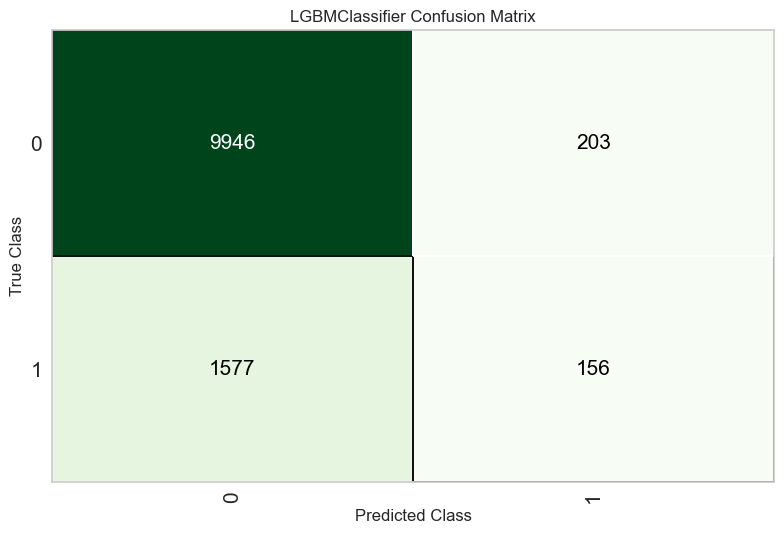

In [21]:
plot_model(lightgbm, plot = 'confusion_matrix')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8514,0.7441,0.1136,0.4646,0.1825,0.1328,0.1736
1,0.8514,0.7145,0.0914,0.4568,0.1523,0.1089,0.1526
2,0.8546,0.7368,0.1188,0.5053,0.1924,0.1449,0.1919
3,0.8449,0.7203,0.0916,0.3700,0.1468,0.0945,0.1230
4,0.8514,0.7342,0.1213,0.4623,0.1922,0.1401,0.1789
5,0.8499,0.7247,0.0866,0.4268,0.1440,0.0998,0.1391
6,0.8564,0.7266,0.1163,0.5341,0.1911,0.1466,0.1993
7,0.8553,0.7348,0.1064,0.5181,0.1766,0.1335,0.1854
8,0.8492,0.7461,0.0914,0.4253,0.1504,0.1041,0.1423


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


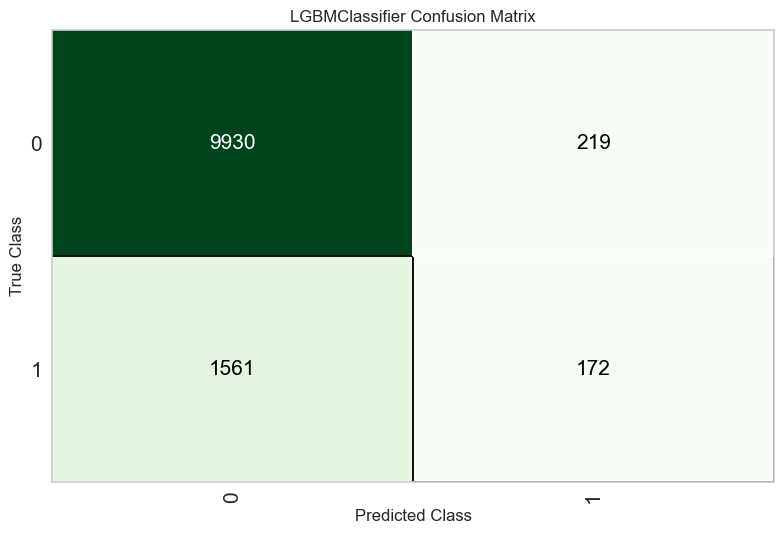

In [22]:
tuned_lightgbm = tune_model(lightgbm,optimize='AUC')
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [23]:
predict_model(lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8502,0.7212,0.0900,0.4345,0.1491,0.1043,0.1444


In [24]:
final_lightgbm = finalize_model(tuned_lightgbm)
print(final_lightgbm)

Pipeline(memory=FastMemory(location=C:\Users\Allan\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['qtd_filhos', 'idade',
                                             'tempo_emprego',
                                             'qt_pessoas_residencia', 'renda',
                                             'sexo_F', 'sexo_M',
                                             'posse_de_veiculo_N',
                                             'posse_de_veiculo_S',
                                             'posse_de_imovel_N',
                                             'posse_de_imovel_S',
                                             'tipo_renda_Assalariado',
                                             'tipo_ren...
                                colsample_bytree=1.0, feature_fraction=0.9,
                                importance_type='split', learning_rate=0.05,
           

In [25]:
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8502,0.7233,0.0992,0.4399,0.1620,0.1144,0.1537


In [26]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (38000, 13)
Conjunto de dados não usados no treino/teste, apenas como validação: (2000, 13)


In [27]:
data_unseen

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,M,S,S,0,Empresário,Médio,Casado,Casa,39,9.284932,2.0,3868.86,0
1,F,N,N,0,Pensionista,Médio,Viúvo,Casa,65,7.766977,1.0,1633.76,0
2,F,N,N,0,Assalariado,Médio,Casado,Casa,50,3.178082,2.0,1234.04,0
3,F,N,N,2,Assalariado,Superior incompleto,Casado,Com os pais,36,8.186301,4.0,1343.26,0
4,M,S,N,1,Assalariado,Médio,Casado,Casa,26,0.380822,3.0,1461.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,F,N,S,0,Pensionista,Médio,Casado,Casa,57,7.766977,2.0,1897.89,0
1996,F,N,S,1,Empresário,Superior completo,Casado,Casa,26,7.972603,3.0,2445.15,0
1997,F,N,N,0,Assalariado,Médio,Casado,Casa,46,20.027397,2.0,6000.67,0
1998,F,S,S,1,Assalariado,Médio,Casado,Casa,34,15.786301,3.0,7867.43,0


In [28]:
df_unseen=preprocessamento(data_unseen)

In [29]:
unseen_predictions = predict_model(final_lightgbm, data=df_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8657,0.7222,0.1259,0.5312,0.2036,0.1597,0.2103


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_S,posse_de_imovel_N,posse_de_imovel_S,tipo_renda_Assalariado,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,tipo_renda_Servidor público,educacao_Fundamental,educacao_Médio,educacao_Pós graduação,educacao_Superior completo,educacao_Superior incompleto,estado_civil_Casado,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,mau,prediction_label,prediction_score
0,0,39,9.284931,2.0,3868.860107,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.8562
1,0,65,7.766977,1.0,1633.760010,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0.7548
2,0,50,3.178082,2.0,1234.040039,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.6348
3,2,36,8.186301,4.0,1343.260010,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0.7238
4,1,26,0.380822,3.0,1461.089966,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.7512


In [30]:
from pycaret.utils.generic import check_metric 
metric_result = check_metric(unseen_predictions['mau'], unseen_predictions['prediction_label'], metric='Accuracy')
print(metric_result)

0.8657


### Salvar o arquivo do modelo treinado

In [31]:
save_model(final_lightgbm,'Final LithtGBM 20220606')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Allan\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda',
                                              'sexo_F', 'sexo_M',
                                              'posse_de_veiculo_N',
                                              'posse_de_veiculo_S',
                                              'posse_de_imovel_N',
                                              'posse_de_imovel_S',
                                              'tipo_renda_Assalariado',
                                              'tipo_ren...
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=0.

# Projeto Final

1. Subir no GITHUB todos os jupyter notebooks/códigos que você desenvolveu nesse ultimo módulo
1. Gerar um arquivo python (.py) com todas as funções necessárias para rodar no streamlit a escoragem do arquivo de treino
    - Criar um .py
    - Criar um carregador de csv no streamlit 
    - Subir um csv no streamlit 
    - Criar um pipeline de pré processamento dos dados
    - Utilizar o modelo treinado para escorar a base 
        - nome_arquivo = 'model_final.pkl'
1. Gravar um vídeo da tela do streamlit em funcionamento (usando o próprio streamlit (temos aula disso) ou qlqr outra forma de gravação).
1. Subir no Github o vídeo de funcionamento da ferramenta como README.md.
1. Subir no Github os códigos desenvolvidos. 
1. Enviar links do github para o tutor corrigir.